# Task 1. Exploring HIV Trends and Poverty Dimensions Across WHO Regions

<div style="text-align: center;">
    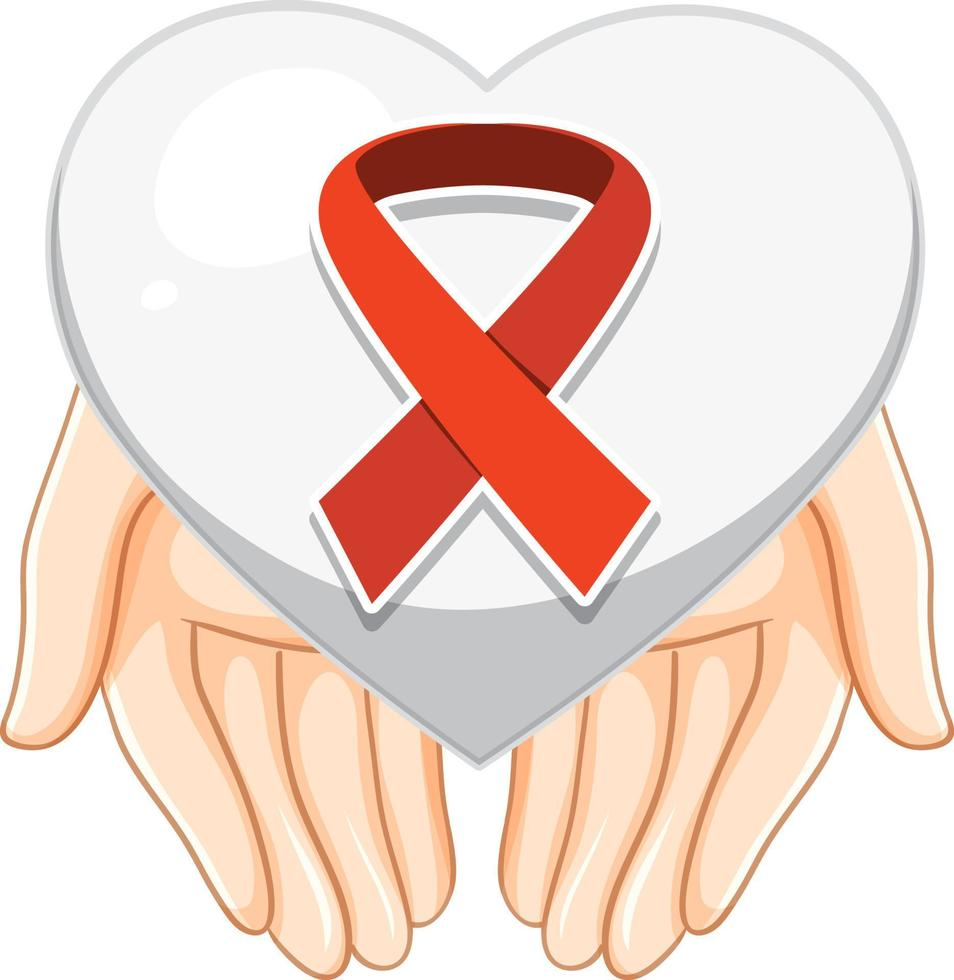
</div>

# 1. Business Understanding

## 1.1 Problem Statement

HIV continues to be a major public health issue in Africa, with a high number of people living with the virus, especially in sub-Saharan regions. While prevention and treatment efforts have improved, HIV is a lifelong condition, making it crucial to track data on this affected. This data helps us identify infection trends, prepare healthcare services to accommodate these patients, and address challenges like stigma and inequality. Beyond health, HIV also impacts jobs, healthcare costs, and poverty levels, making it important to use data to create targeted interventions. By analyzing this information, governments and organizations can better allocate resources and create policies to help reduce transmission and improve the quality of life for those affected.

## 1.2 Objectives

Create a visualization that shows the trend of HIV cases in the countries that contribute to 75% of the global burden </br>
</br>
Generate a visualization that displays the trend of HIV cases in the countries contributing to 75% of the burden within each WHO region (column called ParentLocationCode contains the WHO regions)

# 2. Importing Libraries and Warnings

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from statsmodels.regression.mixed_linear_model import MixedLM

# 3. Data Understanding

You are provided with a dataset from the World Health Organization (WHO) Global Observatory, containing data on people living with HIV at the country level from 2000 to 2023.

In [2]:
hiv_data = pd.read_csv("data/HIV data 2000-2023.csv", encoding="latin1")
hiv_data

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Value
0,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2023,320 000 [280 000 - 380 000]
1,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2022,320 000 [280 000 - 380 000]
2,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2021,320 000 [280 000 - 380 000]
3,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2020,320 000 [280 000 - 370 000]
4,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,AFR,Africa,Country,AGO,Angola,Year,2015,300 000 [260 000 - 350 000]
...,...,...,...,...,...,...,...,...,...,...,...
1547,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2020,No data
1548,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2015,No data
1549,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2010,No data
1550,HIV_0000000001,Estimated number of people (all ages) living w...,numeric,WPR,Western Pacific,Country,WSM,Samoa,Year,2005,No data


You have also been provided with World Bank data on the multidimensional poverty headcount ratio, which includes factors such as income, educational attainment, school enrolment, electricity access, sanitation and drinking water.

In [3]:
poverty_data = pd.read_excel("data/multidimensional_poverty.xlsx")
poverty_data

,"Individuals in households deprived in each indicator, 110 economies, circa year 2021 (2018-2023)\nDate: October 2024",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Region,Country code,Economy,Reporting year,Survey name,Survey year,Survey coverage,Welfare type,Survey comparability,Deprivation rate (share of population),NaN,NaN,NaN,NaN,NaN,Multidimensional poverty headcount ratio (%)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monetary (%),Educational attainment (%),Educational enrollment (%),Electricity (%),Sanitation (%),Drinking water (%),NaN
2,SSA,AGO,Angola,2018,IDREA,2018,N,c,2,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
3,ECA,ALB,Albania,2012,HBS,2018,N,c,1,0.048107,0.19238,-,0.06025,6.579772,9.594966,0.293161
4,LAC,ARG,Argentina,2010,EPHC-S2,2021,U,i,3,0.894218,1.08532,0.731351,0,0.257453,0.364048,0.906573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,ECA,UZB,Uzbekistan,2022,HBS,2022,N,c,1,2.253092,0,-,0.12747,21.786885,10.693686,2.253092
108,EAP,VNM,Viet Nam,2010,VHLSS,2022,N,c,2,0.963795,3.384816,1.841407,0.079733,4.132901,1.968127,1.266184
109,EAP,VUT,Vanuatu,2010,NSDP,2019,N,c,0,9.963333,25.723079,13.404277,26.994166,42.970088,11.813611,19.892171
110,SSA,ZMB,Zambia,2010,LCMS-VIII,2022,N,c,4,64.341974,16.267821,23.39835,45.135146,53.505135,26.849246,66.506058


We would like you to merge this dataset with the HIV data above and analyze the relationship between people living with HIV and multidimensional poverty, and the individual factors that contribute to the ratio. Remember to account for the random effects (country, year).

In [4]:
hiv_data.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'Value'],
      dtype='object')

In [5]:
poverty_data.columns

Index(['Individuals in households deprived in each indicator, 110 economies, circa year 2021 (2018-2023)\nDate: October 2024',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15'],
      dtype='object')

In [6]:
hiv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   IndicatorCode        1552 non-null   object
 1   Indicator            1552 non-null   object
 2   ValueType            1552 non-null   object
 3   ParentLocationCode   1552 non-null   object
 4   ParentLocation       1552 non-null   object
 5   Location type        1552 non-null   object
 6   SpatialDimValueCode  1552 non-null   object
 7   Location             1552 non-null   object
 8   Period type          1552 non-null   object
 9   Period               1552 non-null   int64 
 10  Value                1552 non-null   object
dtypes: int64(1), object(10)
memory usage: 133.5+ KB


In [7]:
poverty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 16 columns):
 #   Column                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                               --------------  ----- 
 0   Individuals in households deprived in each indicator, 110 economies, circa year 2021 (2018-2023)
Date: October 2024  111 non-null    object
 1   Unnamed: 1                                                                                                           111 non-null    object
 2   Unnamed: 2                                                                                                           111 non-null    object
 3   Unnamed: 3                                                                                                           111 non-null    object
 4   Unnamed: 4          

In [8]:
hiv_data.describe()

,Period
count,1552.000000
mean,2014.500000
std,8.080351
min,2000.000000
25%,2008.750000
50%,2017.500000
75%,2021.250000
max,2023.000000


In [9]:
poverty_data.describe()

,"Individuals in households deprived in each indicator, 110 economies, circa year 2021 (2018-2023)\nDate: October 2024",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
count,111,111,111,111,111,111,111,111,111,112,111,111,111,111,111,111
unique,8,111,111,13,58,6,3,4,8,107,107,76,70,80,80,109
top,ECA,Country code,Economy,2010,EU-SILC,2021,N,c,1,0,0,-,0,-,0,0
freq,41,1,1,43,26,40,109,58,30,6,5,36,42,25,24,3


In [10]:
hiv_data.shape

(1552, 11)

In [11]:
poverty_data.shape

(112, 16)

# 4. Data Cleaning

## Renaming columns

In [12]:
hiv_data.rename(columns={
    'Location': 'Country',
    'Period': 'Year',
    'Value': 'HIV_Population'
}, inplace=True)

hiv_data.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Country',
       'Period type', 'Year', 'HIV_Population'],
      dtype='object')

In [13]:
# Rename columns for ease of use
poverty_data.columns = [
    'Region', 'Country_Code', 'Country', 'Year', 'Survey_Name',
    'Survey_Year', 'Survey_Coverage', 'Welfare_Type', 'Survey_Comparability',
    'Monetary', 'Education_Attainment', 'Education_Enrollment',
    'Electricity', 'Sanitation', 'Drinking_Water', 'Multidimensional_Poverty'
]

# Drop the first and second rows
poverty_data = poverty_data.drop(index=[0, 1]).reset_index(drop=True)
poverty_data

,Region,Country_Code,Country,Year,Survey_Name,Survey_Year,Survey_Coverage,Welfare_Type,Survey_Comparability,Monetary,Education_Attainment,Education_Enrollment,Electricity,Sanitation,Drinking_Water,Multidimensional_Poverty
0,SSA,AGO,Angola,2018,IDREA,2018,N,c,2,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
1,ECA,ALB,Albania,2012,HBS,2018,N,c,1,0.048107,0.19238,-,0.06025,6.579772,9.594966,0.293161
2,LAC,ARG,Argentina,2010,EPHC-S2,2021,U,i,3,0.894218,1.08532,0.731351,0,0.257453,0.364048,0.906573
3,ECA,ARM,Armenia,2010,ILCS,2021,N,c,1,0.523521,0,1.793004,0,0.397725,0.660082,0.523521
4,EAP,AUS,Australia,2010,SIH-LIS,2018,N,I,3,0.51688,1.71188,-,0,0,-,2.21577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,ECA,UZB,Uzbekistan,2022,HBS,2022,N,c,1,2.253092,0,-,0.12747,21.786885,10.693686,2.253092
106,EAP,VNM,Viet Nam,2010,VHLSS,2022,N,c,2,0.963795,3.384816,1.841407,0.079733,4.132901,1.968127,1.266184
107,EAP,VUT,Vanuatu,2010,NSDP,2019,N,c,0,9.963333,25.723079,13.404277,26.994166,42.970088,11.813611,19.892171
108,SSA,ZMB,Zambia,2010,LCMS-VIII,2022,N,c,4,64.341974,16.267821,23.39835,45.135146,53.505135,26.849246,66.506058


## Keeping only the relevant columns

In [14]:
hiv_data = hiv_data[['Country', 'Year', 'HIV_Population', 'ParentLocationCode']]
hiv_data

,Country,Year,HIV_Population,ParentLocationCode
0,Angola,2023,320 000 [280 000 - 380 000],AFR
1,Angola,2022,320 000 [280 000 - 380 000],AFR
2,Angola,2021,320 000 [280 000 - 380 000],AFR
3,Angola,2020,320 000 [280 000 - 370 000],AFR
4,Angola,2015,300 000 [260 000 - 350 000],AFR
...,...,...,...,...
1547,Samoa,2020,No data,WPR
1548,Samoa,2015,No data,WPR
1549,Samoa,2010,No data,WPR
1550,Samoa,2005,No data,WPR


In [15]:
poverty_data = poverty_data[[
    'Country',
    'Country_Code',
    'Year',
    'Monetary',
    'Education_Attainment',
    'Education_Enrollment',
    'Electricity',
    'Sanitation',
    'Drinking_Water',
    'Multidimensional_Poverty'
]]

poverty_data

,Country,Country_Code,Year,Monetary,Education_Attainment,Education_Enrollment,Electricity,Sanitation,Drinking_Water,Multidimensional_Poverty
0,Angola,AGO,2018,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
1,Albania,ALB,2012,0.048107,0.19238,-,0.06025,6.579772,9.594966,0.293161
2,Argentina,ARG,2010,0.894218,1.08532,0.731351,0,0.257453,0.364048,0.906573
3,Armenia,ARM,2010,0.523521,0,1.793004,0,0.397725,0.660082,0.523521
4,Australia,AUS,2010,0.51688,1.71188,-,0,0,-,2.21577
...,...,...,...,...,...,...,...,...,...,...
105,Uzbekistan,UZB,2022,2.253092,0,-,0.12747,21.786885,10.693686,2.253092
106,Viet Nam,VNM,2010,0.963795,3.384816,1.841407,0.079733,4.132901,1.968127,1.266184
107,Vanuatu,VUT,2010,9.963333,25.723079,13.404277,26.994166,42.970088,11.813611,19.892171
108,Zambia,ZMB,2010,64.341974,16.267821,23.39835,45.135146,53.505135,26.849246,66.506058


## Duplicates

In [16]:
hiv_data.duplicated().sum()

0

In [17]:
poverty_data.duplicated().sum()

0

## Missing Values

In [18]:
poverty_data.isna().sum()

Country                     0
Country_Code                0
Year                        0
Monetary                    0
Education_Attainment        0
Education_Enrollment        0
Electricity                 0
Sanitation                  0
Drinking_Water              0
Multidimensional_Poverty    0
dtype: int64

In [19]:
poverty_data

,Country,Country_Code,Year,Monetary,Education_Attainment,Education_Enrollment,Electricity,Sanitation,Drinking_Water,Multidimensional_Poverty
0,Angola,AGO,2018,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
1,Albania,ALB,2012,0.048107,0.19238,-,0.06025,6.579772,9.594966,0.293161
2,Argentina,ARG,2010,0.894218,1.08532,0.731351,0,0.257453,0.364048,0.906573
3,Armenia,ARM,2010,0.523521,0,1.793004,0,0.397725,0.660082,0.523521
4,Australia,AUS,2010,0.51688,1.71188,-,0,0,-,2.21577
...,...,...,...,...,...,...,...,...,...,...
105,Uzbekistan,UZB,2022,2.253092,0,-,0.12747,21.786885,10.693686,2.253092
106,Viet Nam,VNM,2010,0.963795,3.384816,1.841407,0.079733,4.132901,1.968127,1.266184
107,Vanuatu,VUT,2010,9.963333,25.723079,13.404277,26.994166,42.970088,11.813611,19.892171
108,Zambia,ZMB,2010,64.341974,16.267821,23.39835,45.135146,53.505135,26.849246,66.506058


In [20]:
# Replace '-' strings with actual NaN values
poverty_data.replace('-', pd.NA, inplace=True)
poverty_data

,Country,Country_Code,Year,Monetary,Education_Attainment,Education_Enrollment,Electricity,Sanitation,Drinking_Water,Multidimensional_Poverty
0,Angola,AGO,2018,31.122005,29.753423,27.44306,52.639532,53.637516,32.106507,47.203606
1,Albania,ALB,2012,0.048107,0.19238,<NA>,0.06025,6.579772,9.594966,0.293161
2,Argentina,ARG,2010,0.894218,1.08532,0.731351,0,0.257453,0.364048,0.906573
3,Armenia,ARM,2010,0.523521,0,1.793004,0,0.397725,0.660082,0.523521
4,Australia,AUS,2010,0.516880,1.71188,<NA>,0,0,<NA>,2.215770
...,...,...,...,...,...,...,...,...,...,...
105,Uzbekistan,UZB,2022,2.253092,0,<NA>,0.12747,21.786885,10.693686,2.253092
106,Viet Nam,VNM,2010,0.963795,3.384816,1.841407,0.079733,4.132901,1.968127,1.266184
107,Vanuatu,VUT,2010,9.963333,25.723079,13.404277,26.994166,42.970088,11.813611,19.892171
108,Zambia,ZMB,2010,64.341974,16.267821,23.39835,45.135146,53.505135,26.849246,66.506058


In [21]:
# Columns to convert
numeric_columns = [
    'Monetary', 'Education_Attainment', 'Education_Enrollment',
    'Electricity', 'Sanitation', 'Drinking_Water', 'Multidimensional_Poverty'
]

# Convert to numeric
poverty_data[numeric_columns] = poverty_data[numeric_columns].apply(pd.to_numeric, errors='coerce')
poverty_data

,Country,Country_Code,Year,Monetary,Education_Attainment,Education_Enrollment,Electricity,Sanitation,Drinking_Water,Multidimensional_Poverty
0,Angola,AGO,2018,31.122005,29.753423,27.443060,52.639532,53.637516,32.106507,47.203606
1,Albania,ALB,2012,0.048107,0.192380,NaN,0.060250,6.579772,9.594966,0.293161
2,Argentina,ARG,2010,0.894218,1.085320,0.731351,0.000000,0.257453,0.364048,0.906573
3,Armenia,ARM,2010,0.523521,0.000000,1.793004,0.000000,0.397725,0.660082,0.523521
4,Australia,AUS,2010,0.516880,1.711880,NaN,0.000000,0.000000,NaN,2.215770
...,...,...,...,...,...,...,...,...,...,...
105,Uzbekistan,UZB,2022,2.253092,0.000000,NaN,0.127470,21.786885,10.693686,2.253092
106,Viet Nam,VNM,2010,0.963795,3.384816,1.841407,0.079733,4.132901,1.968127,1.266184
107,Vanuatu,VUT,2010,9.963333,25.723079,13.404277,26.994166,42.970088,11.813611,19.892171
108,Zambia,ZMB,2010,64.341974,16.267821,23.398350,45.135146,53.505135,26.849246,66.506058


In [22]:
poverty_data[numeric_columns] = poverty_data[numeric_columns].fillna(poverty_data[numeric_columns].mean())
poverty_data

,Country,Country_Code,Year,Monetary,Education_Attainment,Education_Enrollment,Electricity,Sanitation,Drinking_Water,Multidimensional_Poverty
0,Angola,AGO,2018,31.122005,29.753423,27.443060,52.639532,53.637516,32.106507,47.203606
1,Albania,ALB,2012,0.048107,0.192380,9.827403,0.060250,6.579772,9.594966,0.293161
2,Argentina,ARG,2010,0.894218,1.085320,0.731351,0.000000,0.257453,0.364048,0.906573
3,Armenia,ARM,2010,0.523521,0.000000,1.793004,0.000000,0.397725,0.660082,0.523521
4,Australia,AUS,2010,0.516880,1.711880,9.827403,0.000000,0.000000,7.949596,2.215770
...,...,...,...,...,...,...,...,...,...,...
105,Uzbekistan,UZB,2022,2.253092,0.000000,9.827403,0.127470,21.786885,10.693686,2.253092
106,Viet Nam,VNM,2010,0.963795,3.384816,1.841407,0.079733,4.132901,1.968127,1.266184
107,Vanuatu,VUT,2010,9.963333,25.723079,13.404277,26.994166,42.970088,11.813611,19.892171
108,Zambia,ZMB,2010,64.341974,16.267821,23.398350,45.135146,53.505135,26.849246,66.506058


In [23]:
hiv_data.isna().sum()

Country               0
Year                  0
HIV_Population        0
ParentLocationCode    0
dtype: int64

In [24]:
hiv_data

,Country,Year,HIV_Population,ParentLocationCode
0,Angola,2023,320 000 [280 000 - 380 000],AFR
1,Angola,2022,320 000 [280 000 - 380 000],AFR
2,Angola,2021,320 000 [280 000 - 380 000],AFR
3,Angola,2020,320 000 [280 000 - 370 000],AFR
4,Angola,2015,300 000 [260 000 - 350 000],AFR
...,...,...,...,...
1547,Samoa,2020,No data,WPR
1548,Samoa,2015,No data,WPR
1549,Samoa,2010,No data,WPR
1550,Samoa,2005,No data,WPR


There are rows in the HIV_Population column called No data

In [25]:
hiv_data[hiv_data['HIV_Population'] == 'No data'].shape[0]

394

In [26]:
hiv_data[hiv_data['HIV_Population'] == 'No data']

,Country,Year,HIV_Population,ParentLocationCode
40,Central African Republic,2023,No data,AFR
41,Central African Republic,2022,No data,AFR
42,Central African Republic,2021,No data,AFR
43,Central African Republic,2020,No data,AFR
44,Central African Republic,2015,No data,AFR
...,...,...,...,...
1547,Samoa,2020,No data,WPR
1548,Samoa,2015,No data,WPR
1549,Samoa,2010,No data,WPR
1550,Samoa,2005,No data,WPR


In [27]:
# dropping the missing values
hiv_data = hiv_data[hiv_data['HIV_Population'] != 'No data']
hiv_data

,Country,Year,HIV_Population,ParentLocationCode
0,Angola,2023,320 000 [280 000 - 380 000],AFR
1,Angola,2022,320 000 [280 000 - 380 000],AFR
2,Angola,2021,320 000 [280 000 - 380 000],AFR
3,Angola,2020,320 000 [280 000 - 370 000],AFR
4,Angola,2015,300 000 [260 000 - 350 000],AFR
...,...,...,...,...
1531,Viet Nam,2020,250 000 [230 000 - 270 000],WPR
1532,Viet Nam,2015,240 000 [210 000 - 260 000],WPR
1533,Viet Nam,2010,210 000 [190 000 - 230 000],WPR
1534,Viet Nam,2005,180 000 [150 000 - 200 000],WPR


In [28]:
# Removing range values 
hiv_data = hiv_data[hiv_data['HIV_Population'] != 'No data'].copy()
hiv_data['HIV_Population'] = hiv_data['HIV_Population'].str.extract(r'(\d[\d\s]*)')[0]
hiv_data['HIV_Population'] = hiv_data['HIV_Population'].str.replace(' ', '').astype(int)

hiv_data

,Country,Year,HIV_Population,ParentLocationCode
0,Angola,2023,320000,AFR
1,Angola,2022,320000,AFR
2,Angola,2021,320000,AFR
3,Angola,2020,320000,AFR
4,Angola,2015,300000,AFR
...,...,...,...,...
1531,Viet Nam,2020,250000,WPR
1532,Viet Nam,2015,240000,WPR
1533,Viet Nam,2010,210000,WPR
1534,Viet Nam,2005,180000,WPR


# 5. EDA

Create a visualization that shows the trend of HIV cases in the countries that contribute to 75% of the global burden

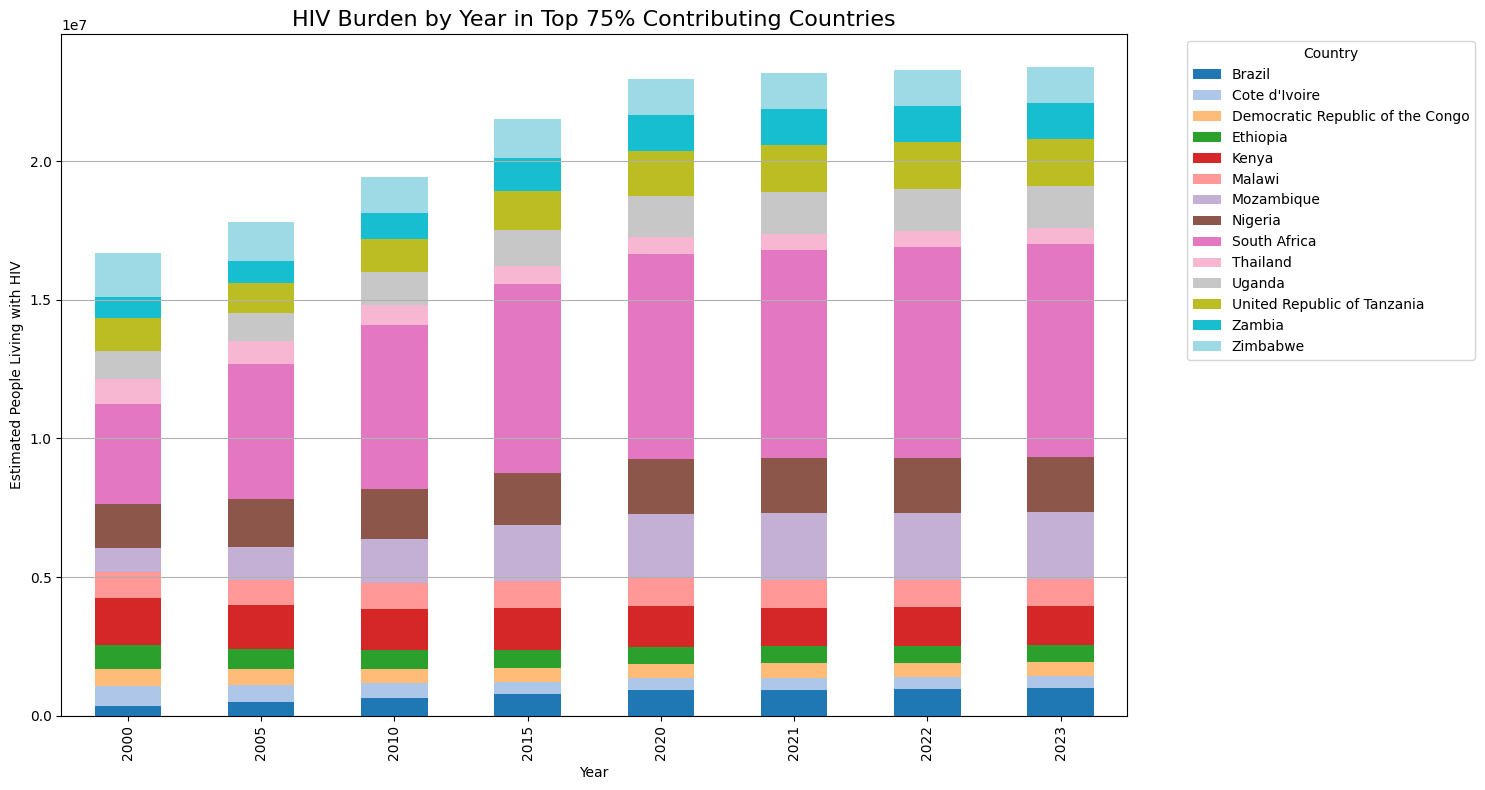

In [29]:
# Total HIV per country
total_by_country = hiv_data.groupby('Country')['HIV_Population'].sum().reset_index()

# Calculate cumulative % contribution
total_by_country = total_by_country.sort_values(by='HIV_Population', ascending=False)
total = total_by_country['HIV_Population'].sum()
total_by_country['CumulativePercent'] = 100 * total_by_country['HIV_Population'].cumsum() / total

# Filter countries that contribute to 75%
top_75_countries = total_by_country[total_by_country['CumulativePercent'] <= 75]['Country']

# Filter and plot
top_data = hiv_data[hiv_data['Country'].isin(top_75_countries)]

# Pivot the data to prepare for bar chart
pivot_df = top_data.pivot_table(index='Year', columns='Country', values='HIV_Population', aggfunc='sum').fillna(0)

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
plt.title('HIV Burden by Year in Top 75% Contributing Countries', fontsize=16)
plt.ylabel('Estimated People Living with HIV')
plt.xlabel('Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

The overall HIV burden globally remained high from 2000 to 2023 — no sharp drop is visible.

Certain countries like South Africa, Nigeria, and Mozambique appear to contribute very large portions to the global burden every year (these countries have thicker bands in the stack).

The number of people living with HIV slightly increases between 2000 and around 2015–2020, and then appears to stabilize or slightly decrease.

The HIV epidemic remains highly concentrated in a small number of countries — that's why top contributors are enough to represent 75% of the global burden.

Generate a visualization that displays the trend of HIV cases in the countries contributing to 75% of the burden within each WHO region (column called ParentLocationCode contains the WHO regions) 

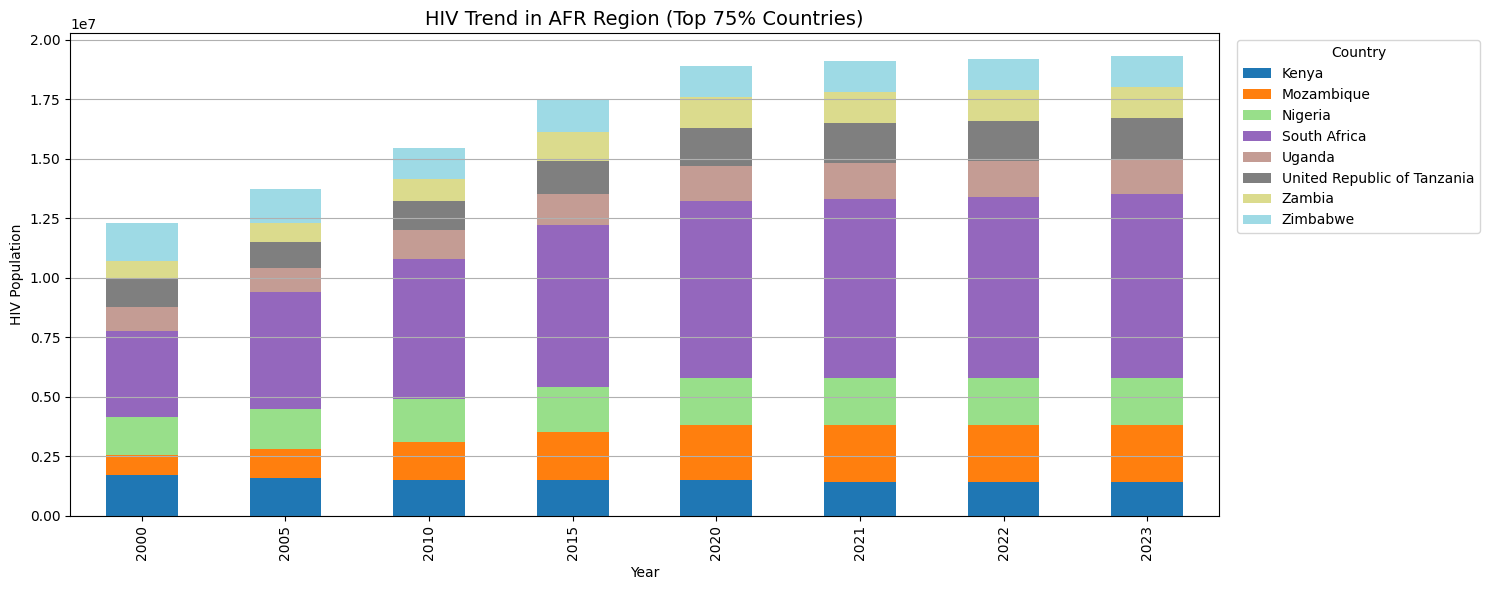

In [30]:
# Calculate total HIV per country within each region
region_country_totals = hiv_data.groupby(['ParentLocationCode', 'Country'])['HIV_Population'].sum().reset_index()

# Identify top 75% contributing countries per region
top_75_countries_by_region = {}

for region in region_country_totals['ParentLocationCode'].unique():
    region_df = region_country_totals[region_country_totals['ParentLocationCode'] == region].sort_values(by='HIV_Population', ascending=False)
    total = region_df['HIV_Population'].sum()
    region_df['CumulativePercent'] = 100 * region_df['HIV_Population'].cumsum() / total
    top_countries = region_df[region_df['CumulativePercent'] <= 75]['Country'].tolist()
    top_75_countries_by_region[region] = top_countries

# Filter original hiv_data for only top 75% countries in each region
filtered_data = hiv_data[
    hiv_data.apply(lambda row: row['Country'] in top_75_countries_by_region.get(row['ParentLocationCode'], []), axis=1)
]

# Filter original hiv_data for only top 75% countries in AFR
filtered_data_afr = filtered_data[filtered_data['ParentLocationCode'] == 'AFR']

# Plot only AFR region
fig, ax = plt.subplots(figsize=(15, 6))  # Only 1 region, so 1 plot

pivot_df = filtered_data_afr.pivot_table(
    index='Year',
    columns='Country',
    values='HIV_Population',
    aggfunc='sum'
).fillna(0)

pivot_df.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    ax=ax
)

ax.set_title('HIV Trend in AFR Region (Top 75% Countries)', fontsize=14)
ax.set_ylabel('HIV Population')
ax.legend(title='Country', bbox_to_anchor=(1.01, 1), loc='upper left')
ax.grid(axis='y')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

South Africa, Nigeria, Uganda, Kenya, and Zimbabwe dominate the HIV burden.

The HIV burden shows a gradual increase up to around 2015–2020, after which it levels off or shows early signs of decline.

Just like globally, a few countries in Africa carry a disproportionate share of the HIV burden.

The pattern highlights regional inequality: even within Africa, a small subset of countries carry the majority of cases.

## Combining hiv_data and poverty_data

We would like you to merge this dataset with the HIV data above and analyze the relationship between people living with HIV and multidimensional poverty, and the individual factors that contribute to the ratio. Remember to account for the random effects (country, year).

In [31]:
# Get all possible pairs within same country
df = pd.merge(hiv_data, poverty_data, on='Country', how='inner', suffixes=('_hiv', '_poverty'))

# Calculate year difference
df['YearDiff'] = (df['Year_hiv'] - df['Year_poverty']).abs()

# Keep the row with the smallest year difference per HIV data row
df = df.loc[df.groupby(['Country', 'Year_hiv'])['YearDiff'].idxmin()].copy()

# Rename to keep consistent
df = df.rename(columns={'Year_hiv': 'Year'})
df

,Country,Year,HIV_Population,ParentLocationCode,Country_Code,Year_poverty,Monetary,Education_Attainment,Education_Enrollment,Electricity,Sanitation,Drinking_Water,Multidimensional_Poverty,YearDiff
311,Albania,2000,200,EUR,ALB,2012,0.048107,0.192380,9.827403,0.060250,6.579772,9.594966,0.293161,12
310,Albania,2005,500,EUR,ALB,2012,0.048107,0.192380,9.827403,0.060250,6.579772,9.594966,0.293161,7
309,Albania,2010,710,EUR,ALB,2012,0.048107,0.192380,9.827403,0.060250,6.579772,9.594966,0.293161,2
308,Albania,2015,1100,EUR,ALB,2012,0.048107,0.192380,9.827403,0.060250,6.579772,9.594966,0.293161,3
307,Albania,2020,1400,EUR,ALB,2012,0.048107,0.192380,9.827403,0.060250,6.579772,9.594966,0.293161,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Zimbabwe,2015,1400000,AFR,ZWE,2017,39.754534,0.927006,5.984225,37.994787,38.285229,19.260145,42.397931,2
155,Zimbabwe,2020,1300000,AFR,ZWE,2017,39.754534,0.927006,5.984225,37.994787,38.285229,19.260145,42.397931,3
154,Zimbabwe,2021,1300000,AFR,ZWE,2017,39.754534,0.927006,5.984225,37.994787,38.285229,19.260145,42.397931,4
153,Zimbabwe,2022,1300000,AFR,ZWE,2017,39.754534,0.927006,5.984225,37.994787,38.285229,19.260145,42.397931,5


# 6. Modelling

In [32]:
# Log-transform the target variable
df['log_HIV_Population'] = np.log1p(df['HIV_Population'])

# Select predictors
predictors = [
    'Monetary', 'Education_Attainment', 'Education_Enrollment',
    'Electricity', 'Sanitation', 'Drinking_Water', 'Multidimensional_Poverty'
]

# Fixed effects
X = sm.add_constant(df[predictors])

# Mixed effects model — random intercept by country
model = MixedLM(
    endog=df['log_HIV_Population'],
    exog=X,
    groups=df['Country']
)

result = model.fit()

print(result.summary())

               Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  log_HIV_Population
No. Observations:  625      Method:              REML              
No. Groups:        79       Scale:               0.3270            
Min. group size:   4        Log-Likelihood:      -724.1026         
Max. group size:   8        Converged:           Yes               
Mean group size:   7.9                                             
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
const                    10.256    0.383 26.768 0.000  9.505 11.007
Monetary                 -0.054    0.060 -0.900 0.368 -0.172  0.064
Education_Attainment     -0.027    0.032 -0.832 0.405 -0.089  0.036
Education_Enrollment     -0.100    0.036 -2.796 0.005 -0.171 -0.030
Electricity              -0.070    0.032 -2.153 0.031 -0.134 -0

## Interpretation

Multidimensional Poverty is significantly associated with higher HIV population (positive coefficient, p=0.014).

Education Enrollment and Electricity access are negatively associated — higher access → fewer HIV cases.

Other factors (Monetary, Sanitation, etc.) may not be statistically significant.

So, multidimensional poverty and education/electricity access are the most influential.

## Write a paragraph on your findings.

The mixed-effects model reveals significant insights into the relationship between multidimensional poverty and HIV prevalence across countries. Notably, Multidimensional Poverty is positively and significantly associated with the number of people living with HIV (p = 0.014), suggesting that as poverty increases—considering factors like education, healthcare access, and living conditions—so does HIV prevalence. Among the individual poverty indicators, Education Enrollment and Access to Electricity are both negatively and significantly associated with HIV (p = 0.005 and p = 0.031, respectively), indicating that higher school enrollment rates and improved electricity access may play protective roles against HIV spread. Other variables, such as sanitation, drinking water, and monetary poverty, did not show significant effects, which could imply that HIV outcomes are more strongly influenced by systemic and structural dimensions of poverty rather than income alone. Additionally, substantial between-country variability (Group Var = 3.04) highlights the importance of accounting for national contexts when addressing HIV, as some countries exhibit much higher or lower prevalence than expected, even after controlling for these poverty-related factors.